### Communicate Data Findings Project

### Ford GoBike System
This data set represents trips taken by members of the Ford Go Bike service for month of February of 2021. Data consists of info about trips taken by service's members,types,age, gender 

**Importing all required libraries**

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import seaborn as sb
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
# Showing the data in the
databike = pd.read_csv('bikenn.txt')
databike.head(4)

In [ ]:
#Show the number of columns and rows

print(databike.shape)

### Assessing

**(Visual assessment) Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes**

In [ ]:
databike.info()

In [ ]:
databike.sample(3)

In [ ]:
#find if there is any duplicated values
databike.duplicated().sum()

we no have any duplicated values

In [ ]:
# cheek null value in all columns
databike.isnull().sum()

In [ ]:
#create copy of original dataframe
copybike = databike.copy()

**Quality Issues**

1-Remove rows which not have gender&which not have start_station_id.
2-Change start_time and end_time to datetime format &  bike share for all trip data type to be bool.
3-Add duration_minites take min from duration_sec then divied 60 & trip start date in yyyy-mm-dd format & trip start hour, day, week, and month & calculating riders' age from 2021-'member_birth_year'= age.
4-concat null values recorded & drop null values recorded.

### Cleaning Data:

**This section consists of the cleaning portion of the data wrangling process:**

**1-defin:**

1-Remove rows which not have gender.

**2-code:**

In [ ]:
# Remove rows which not have gender
copybike = copybike[copybike['member_gender'].isnull() == False]

**3-test:**

In [ ]:
copybike.info()

**1-defin:**

1-Remove rows which not have start_station_id

**2-code:**

In [ ]:

# Remove rows which not have start_station_id
copybike = copybike[copybike['start_station_id'].isnull() == False]

**3-test:**

In [ ]:
copybike.info()

In [ ]:
# Check  nulls 
copybike.isnull().sum()

**1-defin:**
    
2-Change start_time and end_time to datetime format

**2-code:**

In [ ]:
copybike.start_time = pd.to_datetime(copybike.start_time)

copybike.end_time = pd.to_datetime(copybike.end_time)

**3-test:**

In [ ]:
print(copybike.start_time.dtype)
print(copybike.end_time.dtype)

**1-defin:**

2-change bike share for all trip data type to be bool

**2-code:**

In [ ]:
copybike.bike_share_for_all_trip = (copybike.bike_share_for_all_trip == 'Yes')

**3-test:**

In [ ]:
# test  after change timestamp columns 
databike.head(3)

**1-defin:**

1-Add duration_minites take min from duration_sec then divied 50

2-trip start date in yyyy-mm-dd format .

2- trip start hour, day, week, and month..

3- calculating riders' age from 2021-'member_birth_year'= age.


**2-code:**

In [ ]:
copybike['duration_in_minute'] = copybike['duration_sec']/50
copybike['start_date'] = copybike.start_time.dt.strftime('%Y-%m-%d')
copybike['start_hour_of_day'] = copybike.start_time.dt.strftime('%H')
copybike['start_day_of_week'] = copybike.start_time.dt.strftime('%A')
copybike['start_month'] = copybike.start_time.dt.strftime('%B')
copybike['member_age'] = 2021- copybike['member_birth_year']

**3-test:**

In [ ]:
copybike.head(3)

In [ ]:
#Show the number of columns and rows
copybike.shape

In [ ]:
copybike.info()

**1-1-define:**

(4)concat null values recorded

**2-code:**

In [ ]:
databike=pd.concat([databike.isnull().sum(),databike.eq('').sum()],keys=['Nan'],axis=1)

**3-test:**

In [ ]:
print (databike)

**1-2-defin:**
    
(2)drop null values recorded  

**2-code:**

In [ ]:
databike = databike.dropna()

**3-test:**

In [ ]:
copybike.isnull().sum()

### What is the structure of your dataset?


In [ ]:
copybike.info()

**The dataset contains 174952 fordgobike rides with 16 characteristics. (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).**

**There are 9 numerical specifications, 2 datetime specifications, 4 object type specifications, and 1 boolean type specification out of 16 total.**

In [ ]:
# descriptive statistics for numeric variables
copybike.describe()

### What are the main features of interest in your dataset?

I'm particularly interested to know how other dataset characteristics such as age, start and finish station, user type, and gender effect the trip duration.

### What features in the dataset do you think will help support your investigation into your features of interest?

1-The start date&time and duration information for each trip will aid in determining how longer of the trip.

2- The member information, such as user type and gender, will assist us in determining who the key focus customer groups are; additionally, the member birth year will assist us in determining the age of the rider; also the houre day ,month,year will help us 

also and finally, we will use the different groups to summarize bike usage data to see if there is any particular pattern associated with a particular group of riders.

**hour bike Usage**

In [ ]:
copybike['start_hour_of_day'].value_counts()

In [ ]:
copybike['start_day_of_week'].value_counts()

In [ ]:
copybike['start_month'].value_counts()

### Univariate Exploration

In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables

**Trip Start Hour of day**

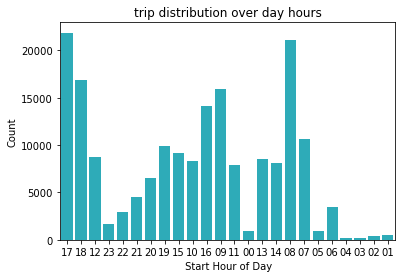

In [12]:
# trip distribution over day hours
sb.countplot(data=copybike, x='start_hour_of_day', color='#17becf');
plt.xlabel(' Start Hour of Day');
plt.ylabel('Count');
plt.title('trip distribution over day hours');

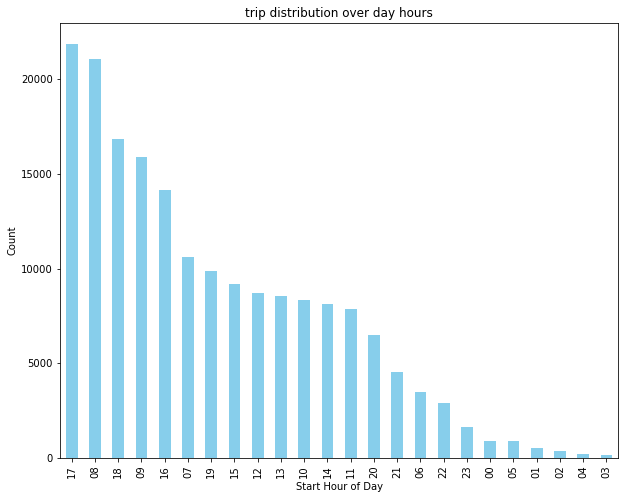

In [11]:
plt.figure(figsize=[10,8]);
plt.title('trip distribution over day hours');
copybike['start_hour_of_day'].value_counts().plot(kind='bar',color='skyblue');
plt.xlabel('Start Hour of Day');
plt.ylabel('Count');

**What are the highest hours of the day?**
 
 we have The two peak hours are 8:00 a.m. and 5:00 p.m.
 Our lowest hours are3:00 a.m. and 4:00 a.m. followed by 2:00 a.m. and 1:a.m. I think most people are asleep at this time

**Trip Start day of week**

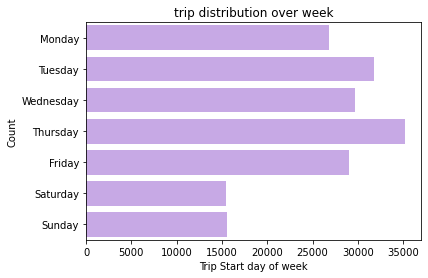

In [9]:
# trip distribution over week

days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayscat = pd.api.types.CategoricalDtype(ordered=True, categories=days_ordered)
copybike['start_day_of_week'] = copybike['start_day_of_week'].astype(dayscat)
sb.countplot(data=copybike, y='start_day_of_week', color='#c79fef');
plt.xlabel('Trip Start day of week');
plt.ylabel('Count');
plt.title('trip distribution over week')
plt.gcf().set_size_inches(6,4)

**What are the most and least days of the week trip in distribution?**

Thursday is the favorite day for bikers, followed by Tuesday.While Saturday and Sunday are the lowest, followed by Friday, perhaps because they are days off, unlike the rest of the week.

**trip distribution over month**

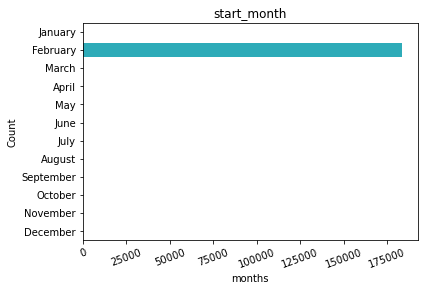

In [8]:
#let the month by order 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
copybike['start_month'] = copybike['start_month'].astype(monthcat)
plt.title('start_month')
# trip distribution over month
sb.countplot(data=copybike, y='start_month', color='#17becf');
plt.xlabel('months');
plt.xticks(rotation=20);
plt.ylabel('Count');

From our distribution of months, February appears among the months


### What is the higher Gender Distribution?

In [9]:
copybike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

Text(0.5, 1.0, 'member_gender')

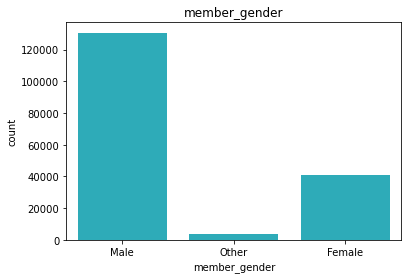

In [18]:
sb.countplot(data =copybike, x = 'member_gender', color = '#17becf');
plt.title('member_gender')

We see that the highest percentage is for males

Text(0, 0.5, 'Number of Users')

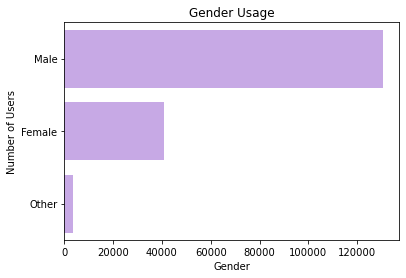

In [10]:
order_t = copybike['member_gender'].value_counts().index
plt.title('Gender Usage')
sb.countplot(data=copybike, y='member_gender', color='#c79fef', order=order_t);
plt.xlabel('Gender')
plt.ylabel('Number of Users')

We see that  The largest proportion of bikers to male Where their proportion exceeded 120,000.While the percentage of girls hardly exceeded 4000, perhaps because they do not find it comfortable or for other reasons.

### What is the Age Distribution?

In [11]:
copybike['member_age'].describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

The maximum age is 143

In [14]:
copybike = copybike[copybike['member_age'] <= 50]
copybike.member_age = copybike.member_age.astype('int')

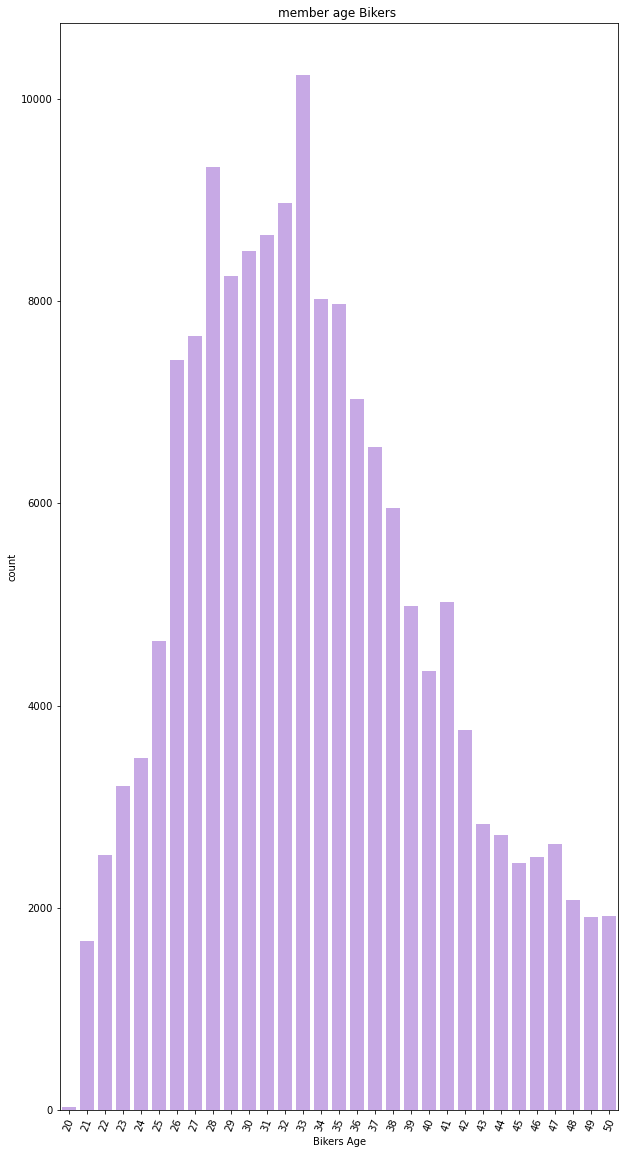

In [15]:
sb.countplot(data = copybike, x = 'member_age', color = '#c79fef');
plt.xticks(rotation=70);
plt.xlabel('Bikers Age');
plt.gcf().set_size_inches(10,20)
plt.title('member age Bikers ');

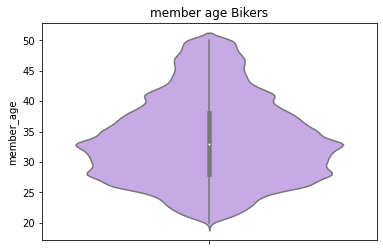

In [16]:
plt.title('member age Bikers');

sb.violinplot(data = copybike, y = 'member_age', color = '#c79fef');



There are many bikers are betwen26 age 33.The highest percentage was for those aged 34 and It decreases as the life expectancy increases.The percentage also decreases as the age decreases and it is younger than 26.

### How many users type?

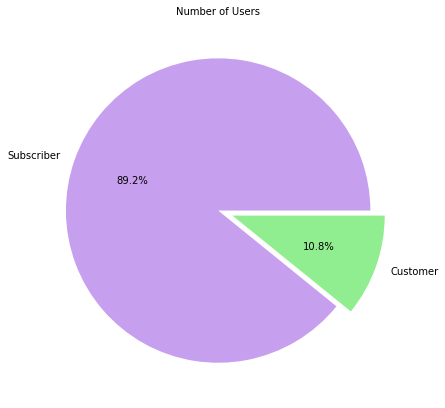

In [15]:
labels=copybike['user_type'].value_counts().index
colors=['#c79fef','lightgreen']
explode=[0,0.1]
values=copybike['user_type'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Number of Users',fontsize=10)
plt.show()

Most of the bike users are subscribers 89.2% ,but customer 10.8%

### How many users typ ebike share for all trip?

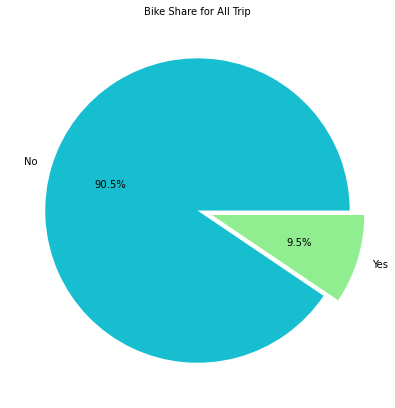

In [16]:
labels=copybike['bike_share_for_all_trip'].value_counts().index
colors=['#17becf','lightgreen']
explode=[0,0.1]
values=copybike['bike_share_for_all_trip'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Bike Share for All Trip',fontsize=10)
plt.show()

The majority of the members did not use bike share for all of their trips The ratio was
the members did not use bike is 90.5%
the members use bike is 9.5%

### Distribution of Trip Durations

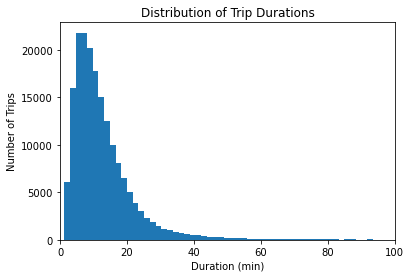

<Figure size 360x360 with 0 Axes>

In [17]:
plt.hist(data = copybike, x = 'duration_in_minute',bins=1000)
plt.title('Distribution of Trip Durations')
plt.xlim(xmin=0, xmax = 100)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.figure(figsize=[5,5])
plt.show()

that most customer use the bike for 1 to 20 and 30 minutes

In [18]:
copybike = copybike.query('duration_in_minute <= 55')

copybike.info(null_counts=True)

<ipython-input-18-3aa34b8bcf84>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  copybike.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180757 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             180757 non-null  int64         
 1   start_time               180757 non-null  datetime64[ns]
 2   end_time                 180757 non-null  datetime64[ns]
 3   start_station_id         180568 non-null  float64       
 4   start_station_name       180568 non-null  object        
 5   start_station_latitude   180757 non-null  float64       
 6   start_station_longitude  180757 non-null  float64       
 7   end_station_id           180568 non-null  float64       
 8   end_station_name         180568 non-null  object        
 9   end_station_latitude     180757 non-null  float64       
 10  end_station_longitude    180757 non-null  float64       
 11  bike_id                  180757 non-null  int64         
 12  user_type       

In [19]:
copybike.duplicated().sum()

0

In [20]:
copybike['duration_in_minute'].describe(percentiles=[.99])

count    180757.000000
mean         12.211053
std           8.234434
min           1.220000
50%          10.160000
99%          43.400000
max          55.000000
Name: duration_in_minute, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    The number of journeys peaked between 8 a.m. and 17 p.m. during the day; there were more trips on weekdays (Tue-Thur), although the bulk of bikers are present on Thursdays vs weekends. February was the most popular month of the year, owing to the weather and the fact that the data only includes the month of February.Male riders outnumbered female riders, and most members were subscribers rather than casual riders. The majority of members did not use bike sharing for all of their journeys, and the majority were between the ages of 26 and 42, with the average age being 33. There aren't many bikers beyond the age of 40. The most of the rides were quick and short.


### Bivariate Exploration

    In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).



In [21]:
copybike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180757 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             180757 non-null  int64         
 1   start_time               180757 non-null  datetime64[ns]
 2   end_time                 180757 non-null  datetime64[ns]
 3   start_station_id         180568 non-null  float64       
 4   start_station_name       180568 non-null  object        
 5   start_station_latitude   180757 non-null  float64       
 6   start_station_longitude  180757 non-null  float64       
 7   end_station_id           180568 non-null  float64       
 8   end_station_name         180568 non-null  object        
 9   end_station_latitude     180757 non-null  float64       
 10  end_station_longitude    180757 non-null  float64       
 11  bike_id                  180757 non-null  int64         
 12  user_type       

### Rlation between gender and duration minute

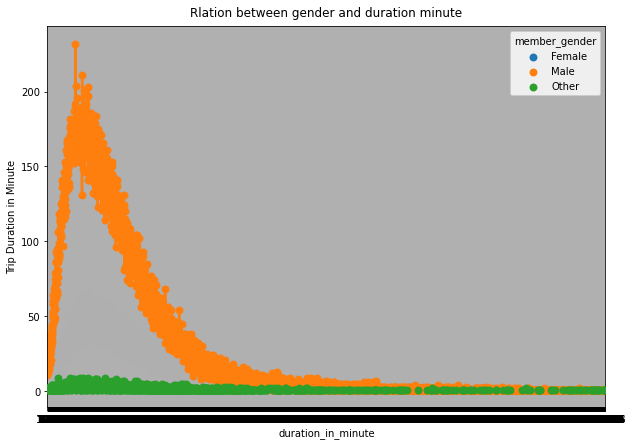

In [23]:
plt.figure(figsize=[ 10, 7]);
data_age_hour = copybike.groupby([ 'member_gender','duration_in_minute']).size().reset_index()
x = sb.pointplot(data=data_age_hour,scale=.9, x='duration_in_minute', y=0, hue = 'member_gender');
plt.title('Rlation between gender and duration minute', y=1.01, fontsize=12)
plt.ylabel('Trip Duration in Minute');
plt.grid()

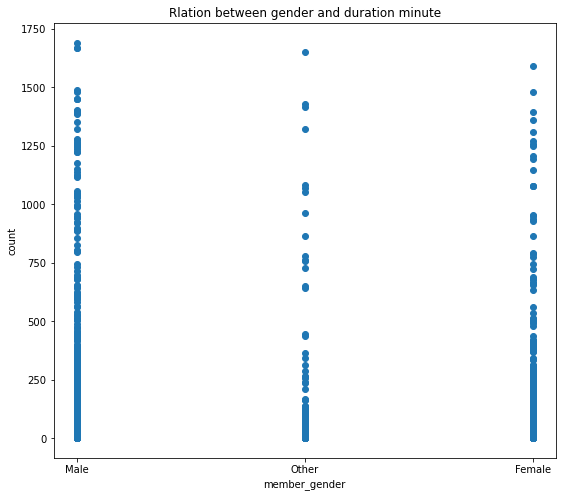

In [20]:
plt.figure(figsize =[9,8])
plt.scatter(x = copybike['member_gender'], y = copybike['duration_in_minute'])
plt.title('Rlation between gender and duration minute');
plt.xlabel('member_gender');
plt.ylabel('count');

### What is the gender difference in trip duration?

From what appears here that the proportion of males is the highest In the duration of the trip, unlike the female, where the duration of the trip was shorter.

### Weekdays' member age:

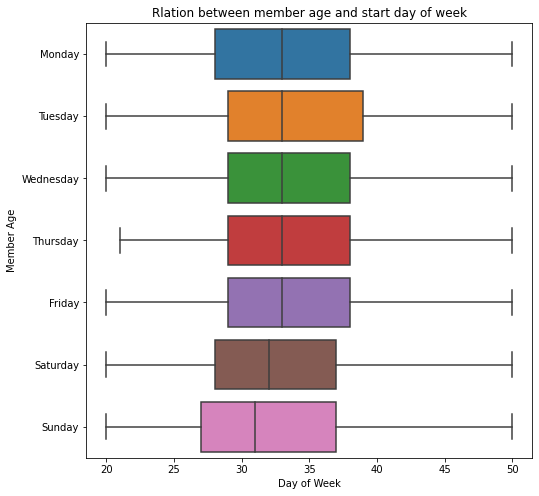

In [22]:
sb.boxplot(data=copybike, x='member_age' , y='start_day_of_week');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.gcf().set_size_inches(8,8)
plt.title('Rlation between member age and start day of week');

The age group on weekdays ranged between 26 as the youngest age and 38 years as the oldest, and the average age ranged between 31 and 34.
Tuesday was the highest in terms of age group, as it was between 30 and 40, and the average was 34.

### Who is the longest time for the trip? Are they the subscribers or the customers?


In [27]:

user_trips=pd.DataFrame(copybike.groupby('user_type')['duration_in_minute'].sum())
user_trips

duration_in_minute
user_type                     
Customer              396691.3
Subscriber           1807696.2

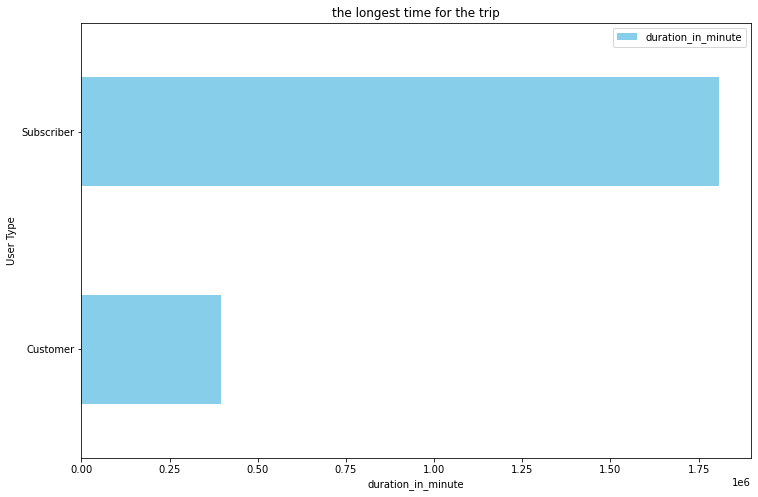

In [28]:
plt =user_trips.plot(kind='barh', figsize=(12,8),color='skyblue');

plt.set_title('the longest time for the trip', fontsize=12)
plt.set_xlabel('duration_in_minute')
plt.set_ylabel('User Type');

The longest period of time are the subscribers As their percentage compared to customers amounted to 2.00 .While the percentage of customers0.52


### Customer and subscription consumption on a weekly usage

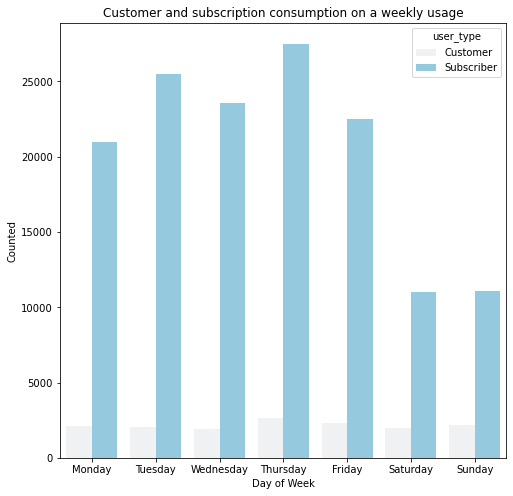

In [30]:
from matplotlib import pyplot as plt
plt.xlabel("My xlabel")
sb.countplot(data=copybike, x='start_day_of_week', hue='user_type',color = 'skyblue');
plt.xlabel('Day of Week');
plt.ylabel('Counted');
plt.title('Customer and subscription consumption on a weekly usage', fontsize=12)
plt.gcf().set_size_inches(8,8)


Overall, subscribers used the service far more than casual customers Tuesdays and Thursdays were the highest of the days.

### Customer and subscription consumption on a daily usage

Text(0.5, 1.0, 'Customer and subscription consumption on a daily usage')

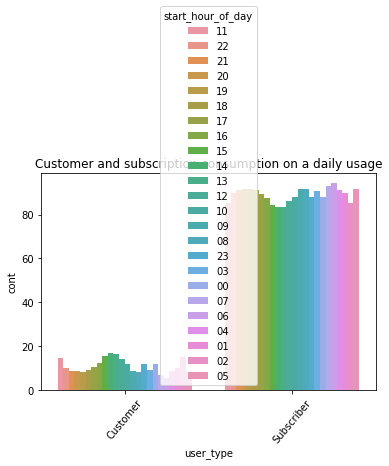

In [51]:
copybike= (copybike.groupby(['start_hour_of_day'])['user_type']
                     .value_counts(normalize=True)
                     .rename('cont')
                     .mul(100)
                     .reset_index()
                     .sort_values('user_type'))
p = sns.barplot(x="user_type", y="cont", hue="start_hour_of_day", data=copybike )
plt.setp(p.get_xticklabels(), rotation=50)
plt.title('Customer and subscription consumption on a daily usage')

Subscriber usage obviously peaks during normal rush hoursbut the  Customers who ride more in the afternoon or early evening for a different purpose than subscriber riders did not show a similar pattern.

### On weekdays, the average trip duration

Text(0.5, 1.0, 'The Average Trip Duration In Minute')

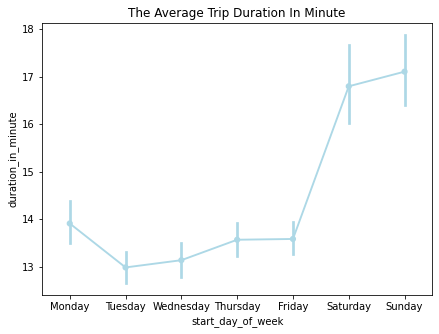

In [24]:
plt.figure(figsize = [7, 5]);
sns.pointplot(scale=.7, color='lightblue',x='start_day_of_week', y='duration_in_minute', data=copybike );
plt.title('The Average Trip Duration In Minute')

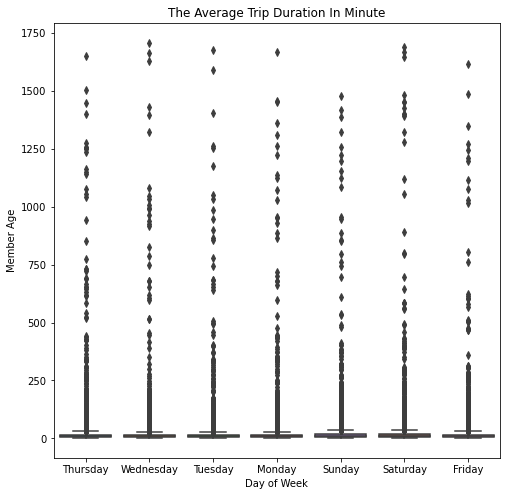

In [67]:
sb.boxplot(data=copybike, x='start_day_of_week' , y='duration_in_minute');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.gcf().set_size_inches(8,8)
plt.title('The Average Trip Duration In Minute');

In comparison to weekends, riding trips are significantly shorter Monday through Friday. while satrday and sunday have more trip durations .

### On mounth, the average trip duration

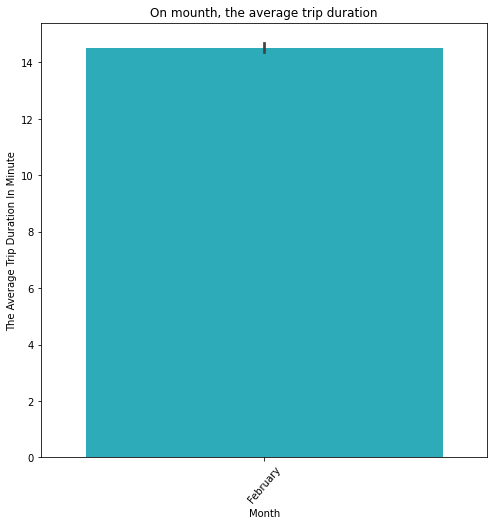

In [68]:


sb.barplot(data=copybike, x='start_month', y='duration_in_minute', color = '#17becf');
plt.xlabel('Month');
plt.ylabel('The Average Trip Duration In Minute');
plt.xticks(rotation=50);
plt.title('On mounththe average trip duration');
plt.gcf().set_size_inches(8,8)

plt.title('On mounth, the average trip duration');

The reason for focusing on the month of February is because the duration times are longer than the rest of the months

In [21]:
copybike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

It appears to us from the above that the subscribers’ usage is much higher than the customer’s usage and this is due to the fact that the subscribers use them for work, while the customer uses them for pleasure, as the percentage of subscribers’ usage was high during peak times, while the customer had a percentage during holidays and after work, as it turned out. From the results we have that the age of the subscribers is greater than the age of the  customer’s,also Subscribers take longer rides on average.

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

It's interesting to see that while subscribers are slightly older than customers on average,the Customers took longer trip duration to have more fun . however weekends where the subscribers took shorter distance trips since they just use it for Work and Home commute purposes.

### Bike Rides by Gender :

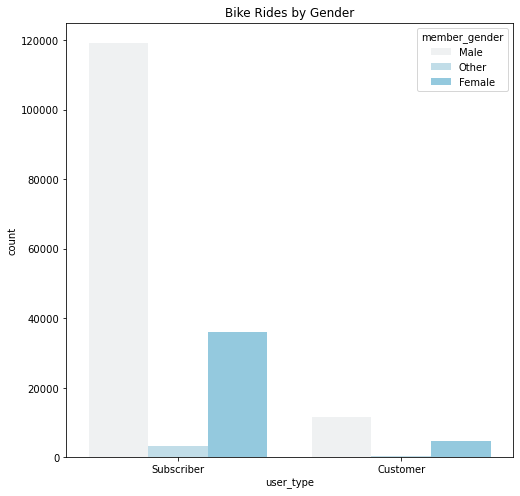

In [69]:
sns.countplot(data=copybike, x="user_type", hue="member_gender", order=copybike.user_type.value_counts().index,color='skyblue')
plt.gcf().set_size_inches(8,8)
plt.title('Bike Rides by Gender');



In comparison to user type, most of Males appears that they using service than females



### Multivariate Exploration

    Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.



### On weekdays, how does the average trip duration differ between customers and subscribers?

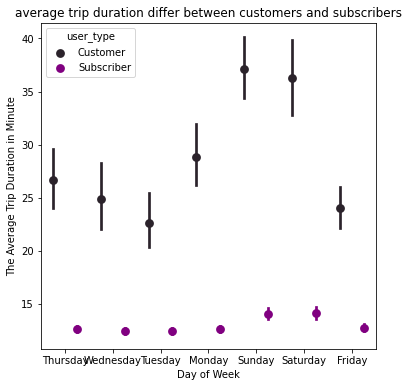

In [73]:
sb.pointplot(data=copybike, x='start_day_of_week', y='duration_in_minute', hue='user_type', dodge=0.5, linestyles="", color = 'purple');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(6,6)
plt.title('average trip duration differ between customers and subscribers');

Subscribers take far shorter/quicker journeys than consumers on each day of the week,  almost all user categories had much longer trips than on weekends, particularly casual riders. Subscribers appear to be more practical than customers in general, with a regular average length from Monday to Friday.

### relationship between start day of week and duration in minute on member gender

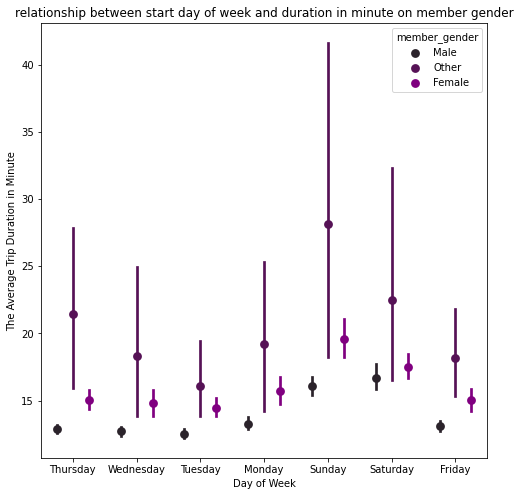

In [71]:
sb.pointplot(data=copybike, x='start_day_of_week', y='duration_in_minute', hue='member_gender', dodge=0.5, linestyles="", color = 'purple');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(8,8)
plt.title('relationship between start day of week and duration in minute on member gender');

male take far shorter/quicker journeys than other and female on each day of the week.Females occupy second place, as their journey is longer than males.While others rank last, I think they go for fun unlike males.
But on weekends, the trip seems longer.

### relationship between start day of week and member age on user type

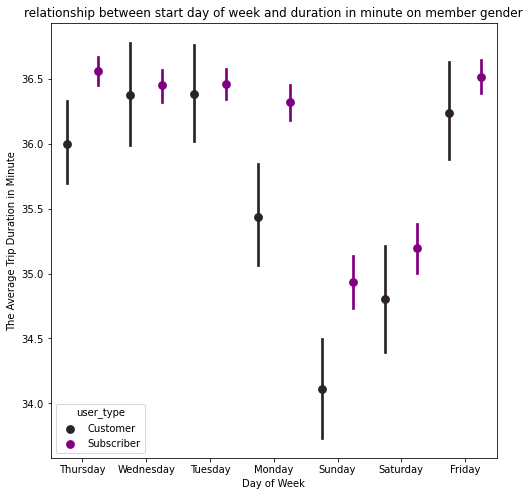

In [72]:
sb.pointplot(data=copybike, x='start_day_of_week', y='member_age', hue='user_type', dodge=0.5, linestyles="", color = 'purple');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(8,8)
plt.title('relationship between start day of week and duration in minute on member gender');

Subscribers take far shorter/quicker journeys than consumers on each day of the week, almost all user categories had much longer trips than on weekends, particularly casual riders.Also, it appears that the age group 33 and 34 are the most active.

In [8]:
copybike.to_csv('Master_cleanBike_system.csv')

In [ ]:
!jupyter nbconvert Communicate_Data_Findings_Project-n.ipynb --to slides --post serve --no-input --no-prompt